<a href="https://colab.research.google.com/github/sualehalam/DeepLearning-Projects/blob/master/Convnet_cats_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# https://www.kaggle.com/c/dogs-vs-cats/data
# Using Mount Drive to mount the data from drive using files.


#from google.colab import drive
#drive.mount('/content/drive')
!pwd
#!ls -ahl drive/My\ Drive|grep dogs
!unzip "drive/My Drive/dogs-vs-cats.zip" 
sourceZipFile = "drive/My Drive/dogs-vs-cats.zip"
#print(os.path.exists(sourceZipFile))


/content
Archive:  drive/My Drive/dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!unzip train.zip
#!unzip test1.zip
!mkdir source_data                     # making a directory
!mv train source_data
#!mv test1 source_data
#!mv sampleSubmission.csv source_data

Streaming output truncated to the last 5000 lines.
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       
  inflating: train/dog.5520.jpg      

In [0]:
#!mv source_data/test1 source_data/test
!ls source_data/train

cat.0.jpg      cat.3250.jpg  cat.7751.jpg   dog.12250.jpg  dog.5500.jpg
cat.10000.jpg  cat.3251.jpg  cat.7752.jpg   dog.12251.jpg  dog.5501.jpg
cat.10001.jpg  cat.3252.jpg  cat.7753.jpg   dog.12252.jpg  dog.5502.jpg
cat.10002.jpg  cat.3253.jpg  cat.7754.jpg   dog.12253.jpg  dog.5503.jpg
cat.10003.jpg  cat.3254.jpg  cat.7755.jpg   dog.12254.jpg  dog.5504.jpg
cat.10004.jpg  cat.3255.jpg  cat.7756.jpg   dog.12255.jpg  dog.5505.jpg
cat.10005.jpg  cat.3256.jpg  cat.7757.jpg   dog.12256.jpg  dog.5506.jpg
cat.10006.jpg  cat.3257.jpg  cat.7758.jpg   dog.12257.jpg  dog.5507.jpg
cat.10007.jpg  cat.3258.jpg  cat.7759.jpg   dog.12258.jpg  dog.5508.jpg
cat.10008.jpg  cat.3259.jpg  cat.775.jpg    dog.12259.jpg  dog.5509.jpg
cat.10009.jpg  cat.325.jpg   cat.7760.jpg   dog.1225.jpg   dog.550.jpg
cat.1000.jpg   cat.3260.jpg  cat.7761.jpg   dog.12260.jpg  dog.5510.jpg
cat.10010.jpg  cat.3261.jpg  cat.7762.jpg   dog.12261.jpg  dog.5511.jpg
cat.10011.jpg  cat.3262.jpg  cat.7763.jpg   dog.12262.jpg  dog.55

In [0]:
!rm -Rf cats_and_dogs_small

In [0]:
import os, shutil
def createIfNot(pathName):
    if os.path.exists(pathName):
        print(pathName, " Already Exists")
    else:
        os.mkdir(pathName)

original_dataset_dir = 'source_data/train'

modelStoragePath = "drive/My Drive/"

base_dir = 'cats_and_dogs_small'
createIfNot(base_dir)
train_dir = os.path.join(base_dir, 'train')
createIfNot(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
createIfNot(validation_dir)
test_dir = os.path.join(base_dir, 'test')
createIfNot(test_dir)
train_cats_dir = os.path.join(train_dir, 'cats')
createIfNot(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
createIfNot(train_dogs_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats')
createIfNot(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
createIfNot(validation_dogs_dir)
test_cats_dir = os.path.join(test_dir, 'cats')
createIfNot(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
createIfNot(test_dogs_dir)

In [0]:
#cats pictures for training
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]                # first 1000 images
print(fnames[1], fnames[10])

for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    print(src)
    dst = os.path.join(train_cats_dir, fname)
    print(dst)
    shutil.copyfile(src, dst)

cat.1.jpg cat.10.jpg
source_data/train/cat.0.jpg
cats_and_dogs_small/train/cats/cat.0.jpg
source_data/train/cat.1.jpg
cats_and_dogs_small/train/cats/cat.1.jpg
source_data/train/cat.2.jpg
cats_and_dogs_small/train/cats/cat.2.jpg
source_data/train/cat.3.jpg
cats_and_dogs_small/train/cats/cat.3.jpg
source_data/train/cat.4.jpg
cats_and_dogs_small/train/cats/cat.4.jpg
source_data/train/cat.5.jpg
cats_and_dogs_small/train/cats/cat.5.jpg
source_data/train/cat.6.jpg
cats_and_dogs_small/train/cats/cat.6.jpg
source_data/train/cat.7.jpg
cats_and_dogs_small/train/cats/cat.7.jpg
source_data/train/cat.8.jpg
cats_and_dogs_small/train/cats/cat.8.jpg
source_data/train/cat.9.jpg
cats_and_dogs_small/train/cats/cat.9.jpg
source_data/train/cat.10.jpg
cats_and_dogs_small/train/cats/cat.10.jpg
source_data/train/cat.11.jpg
cats_and_dogs_small/train/cats/cat.11.jpg
source_data/train/cat.12.jpg
cats_and_dogs_small/train/cats/cat.12.jpg
source_data/train/cat.13.jpg
cats_and_dogs_small/train/cats/cat.13.jpg
sourc

In [0]:
!ls cats_and_dogs_small/train/cats

cat.0.jpg    cat.250.jpg  cat.400.jpg  cat.551.jpg  cat.701.jpg  cat.852.jpg
cat.100.jpg  cat.251.jpg  cat.401.jpg  cat.552.jpg  cat.702.jpg  cat.853.jpg
cat.101.jpg  cat.252.jpg  cat.402.jpg  cat.553.jpg  cat.703.jpg  cat.854.jpg
cat.102.jpg  cat.253.jpg  cat.403.jpg  cat.554.jpg  cat.704.jpg  cat.855.jpg
cat.103.jpg  cat.254.jpg  cat.404.jpg  cat.555.jpg  cat.705.jpg  cat.856.jpg
cat.104.jpg  cat.255.jpg  cat.405.jpg  cat.556.jpg  cat.706.jpg  cat.857.jpg
cat.105.jpg  cat.256.jpg  cat.406.jpg  cat.557.jpg  cat.707.jpg  cat.858.jpg
cat.106.jpg  cat.257.jpg  cat.407.jpg  cat.558.jpg  cat.708.jpg  cat.859.jpg
cat.107.jpg  cat.258.jpg  cat.408.jpg  cat.559.jpg  cat.709.jpg  cat.85.jpg
cat.108.jpg  cat.259.jpg  cat.409.jpg  cat.55.jpg   cat.70.jpg	 cat.860.jpg
cat.109.jpg  cat.25.jpg   cat.40.jpg   cat.560.jpg  cat.710.jpg  cat.861.jpg
cat.10.jpg   cat.260.jpg  cat.410.jpg  cat.561.jpg  cat.711.jpg  cat.862.jpg
cat.110.jpg  cat.261.jpg  cat.411.jpg  cat.562.jpg  cat.712.jpg  cat.863.jpg
c

In [0]:
#getting 500 cats pictures for testing
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

In [0]:
#getting 500 pictures for validation
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [0]:
#getting 1000 dogs pics for traing
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

#getting 500 dogs pics for testing
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

##getting 500 dogs pics for validation
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [0]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))


total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [0]:
from tensorflow.keras import datasets, layers, models, optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [0]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),               # lr = learning rate
metrics=['acc'])

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255)                  # dividing by 255 to convert image between 0 - 1 [ image has total pixels = 255]
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150), 
    batch_size=20,
    class_mode='binary')                                             # 1 means cat, 0 means dog

validation_generator = test_datagen.flow_from_directory(
    validation_dir,target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
#testing
#print(train_generator)
counter =0
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    print(labels_batch[counter])
    counter += 1
    print(counter)
    if counter > 3:
        break
print(counter)        

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)
1.0
1
data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)
1.0
2
data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)
0.0
3
data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)
1.0
4
4


In [0]:
import pickle
def saveData(model, history, iteration):
    modelFile = modelStoragePath + "model_cats_dogs_small" + str(iteration).strip() + ".h5"  # .strip() removes spaces 
    historyFile = modelStoragePath + "History_cats_and_dogs_small" + str(iteration).strip() + ".pkle"
    model.save(modelFile)
    #saving history file too
    with open(historyFile, 'wb') as file_pi:
        pickle.dump(history.history, file_pi)
    return modelFile, historyFile

import tensorflow.keras.models
def loadData(iteration):
    modelFile = modelStoragePath + "model_cats_dogs_small" + str(iteration).strip() + ".h5"
    historyFile = modelStoragePath + "History_cats_and_dogs_small" + str(iteration).strip() + ".pkle"
    model = models.load_model(modelFile)
    with open(historyFile, 'rb') as file_pi:
        history = pickle.load(file_pi)
    return model, history

In [0]:
#Listing 5.8 Fitting the model using a batch generator
#Please use Model.fit, which supports generators.
history = model.fit(
train_generator,
steps_per_epoch=100,
epochs=30,
validation_data=validation_generator,                      
validation_steps=30)
                                                                   # 98.75 accuracy
modelFile, HistoryFile = saveData(model, history, iteration=1)
print(modelFile, HistoryFile, "Saved")

Epoch 1/30
100/100 [==============================] - 9s 85ms/step - loss: 0.6908 - acc: 0.5390 - val_loss: 0.6800 - val_acc: 0.5800
Epoch 2/30
100/100 [==============================] - 8s 84ms/step - loss: 0.6646 - acc: 0.6095 - val_loss: 0.6402 - val_acc: 0.6550
Epoch 3/30
100/100 [==============================] - 8s 83ms/step - loss: 0.6226 - acc: 0.6570 - val_loss: 0.6209 - val_acc: 0.6600
Epoch 4/30
100/100 [==============================] - 8s 83ms/step - loss: 0.5806 - acc: 0.6995 - val_loss: 0.6286 - val_acc: 0.6533
Epoch 5/30
100/100 [==============================] - 8s 83ms/step - loss: 0.5377 - acc: 0.7270 - val_loss: 0.5939 - val_acc: 0.6717
Epoch 6/30
100/100 [==============================] - 8s 84ms/step - loss: 0.5092 - acc: 0.7475 - val_loss: 0.5947 - val_acc: 0.6933
Epoch 7/30
100/100 [==============================] - 8s 84ms/step - loss: 0.4765 - acc: 0.7700 - val_loss: 0.5796 - val_acc: 0.6983
Epoch 8/30
100/100 [==============================] - 8s 83ms/step - 

In [0]:
print(type(history))
modelFile, HistoryFile = saveData(model, history, iteration=1)
print(modelFile, HistoryFile, "Saved")

<class 'tensorflow.python.keras.callbacks.History'>
drive/My Drive/model_cats_dogs_small1.h5 drive/My Drive/History_cats_and_dogs_small1.pkle Saved


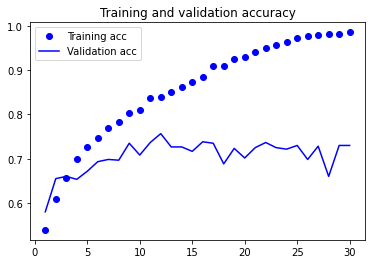

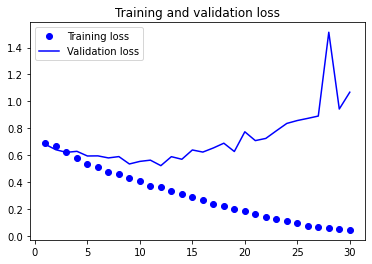

In [0]:

#model, history = loadData(iteration = 1)

#Listing 5.10 Displaying curves of loss and accuracy during training
import matplotlib.pyplot as plt
%matplotlib inline  

history = history.history
acc = history['acc']
val_acc = history['val_acc']
loss = history['loss']
val_loss = history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
#plt.xlabel('epochs')
#plt.ylabel('loss')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [0]:
#Listing 5.11 Setting up a data augmentation configuration via ImageDataGenerator
datagen = ImageDataGenerator(
rotation_range=40,                # To rotate the image 40 degrees
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

In [0]:
# Image data augmentation is a technique that can be used to artificially expand the size of a training dataset
# by creating modified versions of images in the dataset.

# Data augmentation is a technique to artificially create new training data from existing training data. 

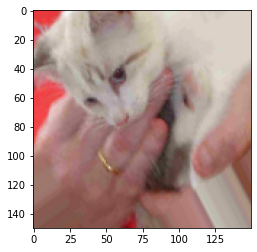

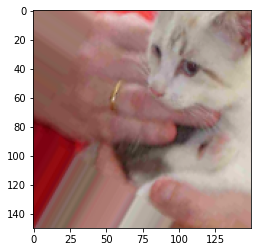

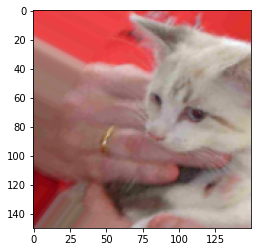

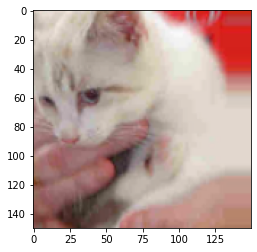

In [0]:
#Listing 5.12 Displaying some randomly augmented training images
from keras.preprocessing import image
fnames = [os.path.join(train_cats_dir, fname) for
fname in os.listdir(train_cats_dir)]
img_path = fnames[4]                        # using 3rd image to store. Can change this to change cat picture output
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [0]:
#Listing 5.13 Defining a new convnet that includes dropout
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))              # Dropout is a technique used to prevent a model from overfitting
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),      # learning rate
metrics=['acc'])

In [0]:
#Listing 5.14 Training the convnet using data-augmentation generators
train_datagen = ImageDataGenerator(
    rescale=1./255,                        # to convert image pixels between 0 and 1. Total pixels = 255
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
# this takes around 40 minutes to run
history = model.fit(
    train_generator,
    steps_per_epoch=100,                       # can also reduce step_per_epoch to 20
    epochs=100,                                
    validation_data=validation_generator,
    validation_steps=50)


Epoch 1/100
100/100 [==============================] - 31s 307ms/step - loss: 0.6948 - acc: 0.5302 - val_loss: 0.6961 - val_acc: 0.5000
Epoch 2/100
100/100 [==============================] - 31s 306ms/step - loss: 0.6830 - acc: 0.5587 - val_loss: 0.6641 - val_acc: 0.5883
Epoch 3/100
100/100 [==============================] - 31s 310ms/step - loss: 0.6741 - acc: 0.5804 - val_loss: 0.6697 - val_acc: 0.5730
Epoch 4/100
100/100 [==============================] - 31s 306ms/step - loss: 0.6608 - acc: 0.6070 - val_loss: 0.6647 - val_acc: 0.5664
Epoch 5/100
100/100 [==============================] - 31s 307ms/step - loss: 0.6479 - acc: 0.6171 - val_loss: 0.6246 - val_acc: 0.6472
Epoch 6/100
100/100 [==============================] - 31s 307ms/step - loss: 0.6340 - acc: 0.6342 - val_loss: 0.6513 - val_acc: 0.6050
Epoch 7/100
100/100 [==============================] - 31s 306ms/step - loss: 0.6190 - acc: 0.6600 - val_loss: 0.5930 - val_acc: 0.6888
Epoch 8/100
100/100 [===========================

In [0]:

modelFile, historyFile = saveData(model, history, iteration = 2)
print(modelFile, historyFile, " Saved")

drive/My Drive/model_cats_dogs_small2.h5 drive/My Drive/History_cats_and_dogs_small2.pkle  Saved


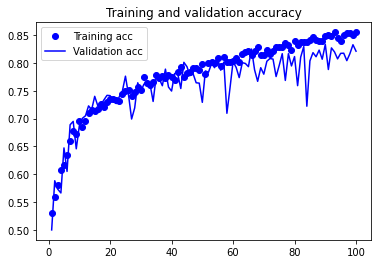

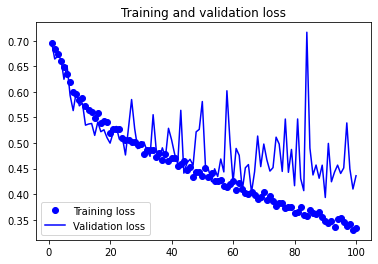

In [0]:

#model, history = loadData(iteration = 1)

#Listing 5.10 Displaying curves of loss and accuracy during training
import matplotlib.pyplot as plt
%matplotlib inline  

history = history.history
acc = history['acc']
val_acc = history['val_acc']
loss = history['loss']
val_loss = history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()